<a href="https://colab.research.google.com/github/luc-leonard/taming-transformers/blob/master/scripts/clip_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK PREPARATION


In [3]:
!git clone https://github.com/luc-leonard/taming-transformers
!git clone https://github.com/openai/CLIP

Cloning into 'taming-transformers'...
remote: Enumerating objects: 756, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 756 (delta 47), reused 63 (delta 27), pack-reused 658
Receiving objects: 100% (756/756), 118.84 MiB | 24.81 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Cloning into 'CLIP'...
remote: Enumerating objects: 90, done.
remote: Total 90 (delta 0), reused 0 (delta 0), pack-reused 90
Unpacking objects: 100% (90/90), done.


In [9]:
!pip install kornia omegaconf pytorch-lightning ftfy

     |████████████████████████████████| 286kB 4.1MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 808kB 7.2MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 645kB 12.7MB/s 
     |████████████████████████████████| 112kB 17.3MB/s 
     |████████████████████████████████| 10.6MB 15.5MB/s 
     |████████████████████████████████| 112kB 40.6MB/s 
     |████████████████████████████████| 829kB 33.0MB/s 
     |████████████████████████████████| 276kB 34.8MB/s 
     |████████████████████████████████| 1.3MB 38.4MB/s 
     |████████████████████████████████| 296kB 32.6MB/s 
     |████████████████████████████████| 143kB 44.4MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=c96cb73bd8da2a054370d8207db1b0b27ce8b0ffa2cbf561fbf206942a6afcf3
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
  Created wheel for ant

## DOWNLOADING VQGAN MODEL

In [4]:
!curl -L 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' > vqgan_imagenet_f16_16384.yaml
!curl -L 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1' > vqgan_imagenet_f16_16384.ckpt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   692  100   692    0     0    434      0  0:00:01  0:00:01 --:--:--   434
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  934M  100  934M    0     0  10.7M      0  0:01:26  0:01:26 --:--:-- 11.4M


## imports

# HAVE WE BEEN LUCKY ? :)

/!\ DO NOT FORGET TO GO TO 'runtime' => 'change runtime type' and to choose a GPU instance !

In [6]:
!nvidia-smi

Fri Jun 11 13:10:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# RUNNING

In [ ]:
import sys
sys.path.append('taming-transformers')
sys.path.append('CLIP')

from scripts.clip_generator.trainer import Trainer
from scripts.clip_generator.dreamer import load_vqgan_model
import clip
from PIL import Image

device = 'cuda'

vqgan_model = load_vqgan_model('./vqgan_imagenet_f16_16384.yaml', './vqgan_imagenet_f16_16384.ckpt')
clip_model = clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)

In [7]:
#@title Example form fields
#@markdown Forms support many types of fields.

prompt = 'A bunch of foxes'  #@param {type: "string"}
epochs = 240  #@param {type: "slider", min: 100, max: 1000}
#@markdown ---


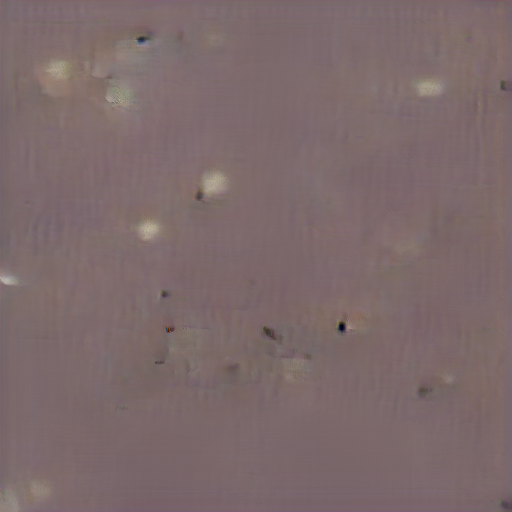

  3% (8 of 240) |                        | Elapsed Time: 0:00:34 ETA:   0:16:41

In [ ]:
from IPython import display

trainer = Trainer([prompt], vqgan_model, clip_model, save_every=10, steps=epochs, device=device)
for _ in trainer.epoch():
  display.clear_output()
  display.display(Image.open('./out/progress_latest.png'))